In [1]:
%cd /home/ltchen/gnnpp
import sys
import os
sys.path.insert(0, os.path.abspath(os.path.join(os.getcwd(), '..')))
import matplotlib.pyplot as plt
from utils.data import load_dataframes, summary_statistics
from utils.drn_utils import normalize_features

import seaborn as sns
import pandas as pd
import numpy as np
import cmasher as cmr
DIRECTORY = os.getcwd()
FIGUREPATH = os.path.join(DIRECTORY, 'figures')
os.makedirs(FIGUREPATH, exist_ok=True)

/home/ltchen/gnnpp


In [2]:
# Function to coler different time horizons differently
def get_color(name):
    if "24h" in name:
        return cmr.get_sub_cmap(cmr.swamp,0.3,0.8)
    elif "72h" in name:
        return cmr.get_sub_cmap(cmr.freeze,0.3,0.8)
    elif "120h" in name:
        return cmr.get_sub_cmap(cmr.flamingo,0.3,0.8)
    else:
        return cmr.get_sub_cmap(cmr.amber,0.3,0.8)

In [3]:
# color = get_color('24h')
color = 'skyblue'

In [2]:
dataframes = load_dataframes(leadtime="24h")
(t_train_rf, t_train_rf_target) = dataframes["train"]
(t_test_rf, t_test_rf_target) = dataframes["test_rf"]
(t_test_f, t_test_f_target) = dataframes["test_f"]
t_stations_f = dataframes["stations"]
sum_dfs_train = summary_statistics(dataframes)

[INFO] Dataframes exist. Will load pandas dataframes.
[INFO] Calculating summary statistics for train
[INFO] Calculating summary statistics for valid
[INFO] Calculating summary statistics for test_rf
[INFO] Calculating summary statistics for test_f


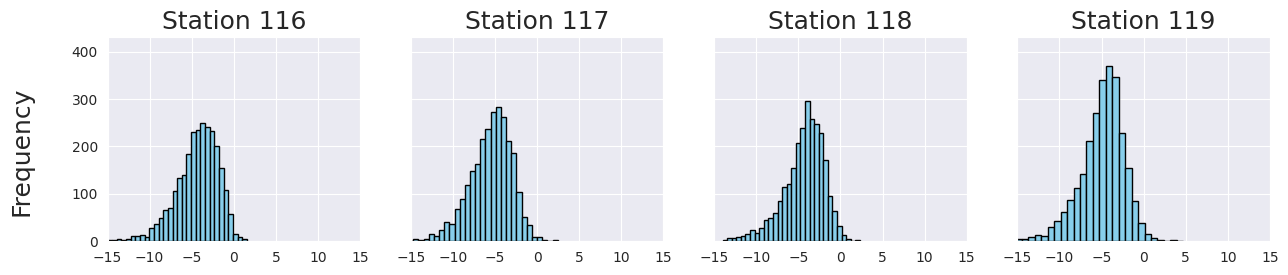

In [16]:
fig, axes = plt.subplots(1, 4, figsize=(15, 3), sharey=True)
axes = axes.flatten()
e_stations = np.arange(116, 120, 1)

for i, id in enumerate(e_stations):
    t2m_errors_station = np.array(sum_dfs_train['train'][0][sum_dfs_train['train'][0]['station_id']== id]['t2m_mean'] - sum_dfs_train['train'][1][sum_dfs_train['train'][1]['station_id'] == id]['t2m'])
    axes[i].hist(t2m_errors_station.flatten(), bins=30, color=color, edgecolor='black')
    axes[i].set_title(f"Station {id}", fontsize=18)
    # axes[i].set_xlabel("Value")
    # axes[i].set_ylabel("Frequency")

for ax in axes:
    ax.set_xlim(-15, 15)
    ax.set_ylim(0, 430)
# plt.tight_layout()
fig.text(0.06, 0.5, 'Frequency', va='center', rotation='vertical', fontsize=18)
# fig.text(0.5, 0.04, 't2m value errors (t2m_ensemble_mean - t2m_observed)', ha='center', fontsize=12)
fig.subplots_adjust(bottom=0.2)
plt.savefig(os.path.join(FIGUREPATH, "eda/eda_errdist_south.pdf"), bbox_inches = 'tight', dpi=300)
plt.show()

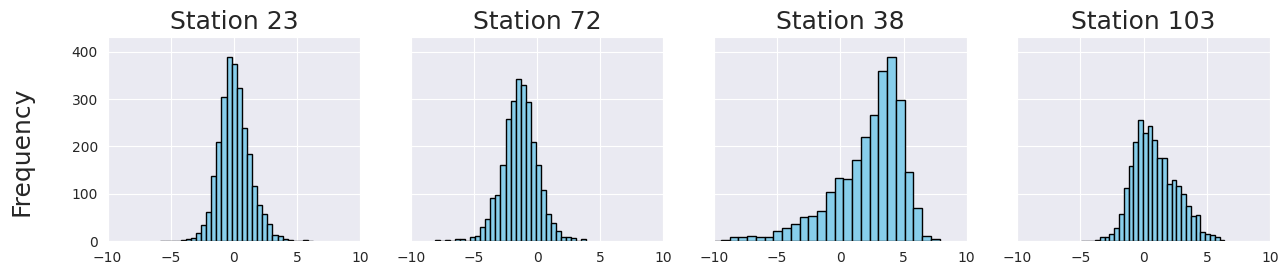

In [17]:
fig, axes = plt.subplots(1, 4, figsize=(15, 3), sharey=True)
axes = axes.flatten()
# e_stations = np.arange(116, 120, 1)
e_stations = [23, 72, 38, 103]

for i, id in enumerate(e_stations):
    t2m_errors_station = np.array(sum_dfs_train['train'][0][sum_dfs_train['train'][0]['station_id']== id]['t2m_mean'] - sum_dfs_train['train'][1][sum_dfs_train['train'][1]['station_id'] == id]['t2m'])
    axes[i].hist(t2m_errors_station.flatten(), bins=30, color=color, edgecolor='black')
    axes[i].set_title(f"Station {id}", fontsize=18)
    # axes[i].set_xlabel("Value")
    # axes[i].set_ylabel("Frequency")

for ax in axes:
    ax.set_xlim(-10, 10)
    ax.set_ylim(0, 430)

fig.text(0.06, 0.5, 'Frequency', va='center', rotation='vertical', fontsize=18)
# fig.text(0.5, 0.04, 't2m value errors (t2m_ensemble_mean - t2m_observed)', ha='center', fontsize=12)
fig.subplots_adjust(bottom=0.2)
# plt.tight_layout()
plt.savefig(os.path.join(FIGUREPATH, "eda/eda_errdist_overview.pdf"), bbox_inches = 'tight', dpi=300)
plt.show()

## CRPS Explanation

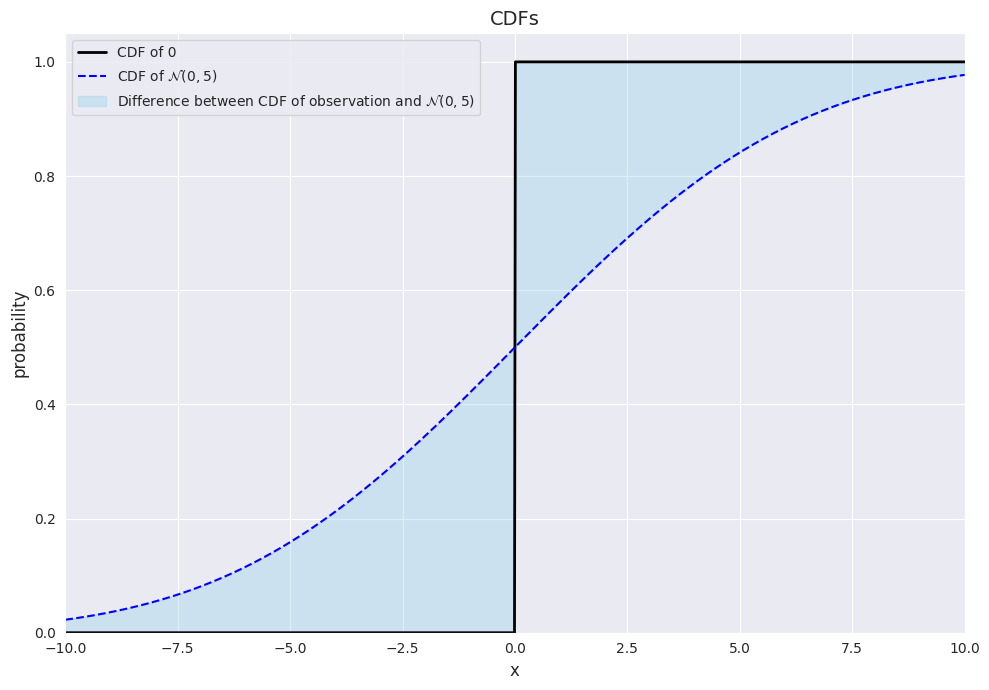

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import torch

# Create a range of x values
x = np.linspace(-10, 10, 1000)

cdf_0 = np.where(x < 0, 0, 1)
cdf_n05 = norm.cdf(x, loc=-0, scale=5)
cdf_n01 = norm.cdf(x, loc=-0, scale=1)

plt.figure(figsize=(10, 7))

# CDFs
plt.plot(x, cdf_0, 'k-', linewidth=2, label='CDF of 0')
plt.plot(x, cdf_n05, 'b--', linewidth=1.5, label='CDF of $\mathcal{N}(0,5)$')

# Fill areas to show differences
plt.fill_between(x, cdf_0, cdf_n05, where=(cdf_0 > cdf_n05), color='skyblue', alpha=0.3,label='Difference between CDF of observation and $\mathcal{N}(0,5)$')
plt.fill_between(x, cdf_0, cdf_n05, where=(cdf_0 < cdf_n05), color='skyblue', alpha=0.3)

# Add grid, labels, and legend
plt.grid(True)
plt.xlabel('x', fontsize=12)
plt.ylabel('probability', fontsize=12)
plt.title('CDFs', fontsize=14)
plt.legend(loc='upper left', fontsize=10)

# Set axis limits
plt.xlim(-10, 10)
plt.ylim(0, 1.05)

plt.tight_layout()
plt.show()

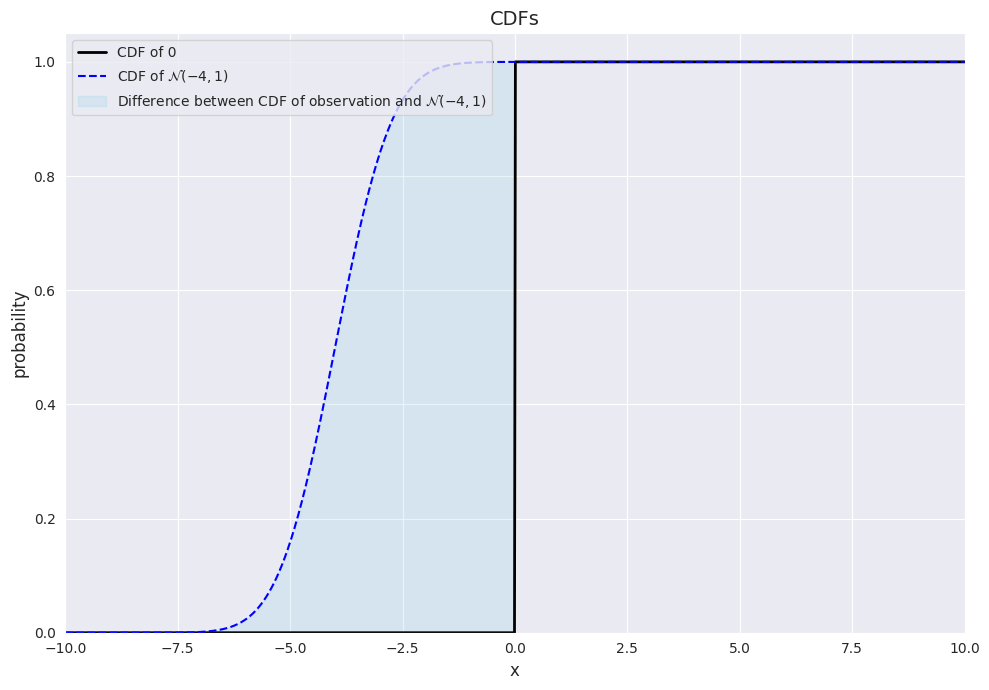

In [43]:
x = np.linspace(-10, 10, 1000)

cdf_0 = np.where(x < 0, 0, 1)
cdf_n41 = norm.cdf(x, loc=-4, scale=1)

plt.figure(figsize=(10, 7))

plt.plot(x, cdf_0, 'k-', linewidth=2, label='CDF of 0')
plt.plot(x, cdf_n41, 'b--', linewidth=1.5, label='CDF of $\mathcal{N}(-4,1)$')
plt.fill_between(x, cdf_0, cdf_n41, where=(cdf_0 > cdf_n41), color='skyblue', alpha=0.2, label='Difference between CDF of observation and $\mathcal{N}(-4,1)$')
plt.fill_between(x, cdf_0, cdf_n41, where=(cdf_0 < cdf_n41), color='skyblue', alpha=0.2)

plt.grid(True)
plt.xlabel('x', fontsize=12)
plt.ylabel('probability', fontsize=12)
plt.title('CDFs', fontsize=14)
plt.legend(loc='upper left', fontsize=10)

# Set axis limits
plt.xlim(-10, 10)
plt.ylim(0, 1.05)

plt.tight_layout()
plt.show()

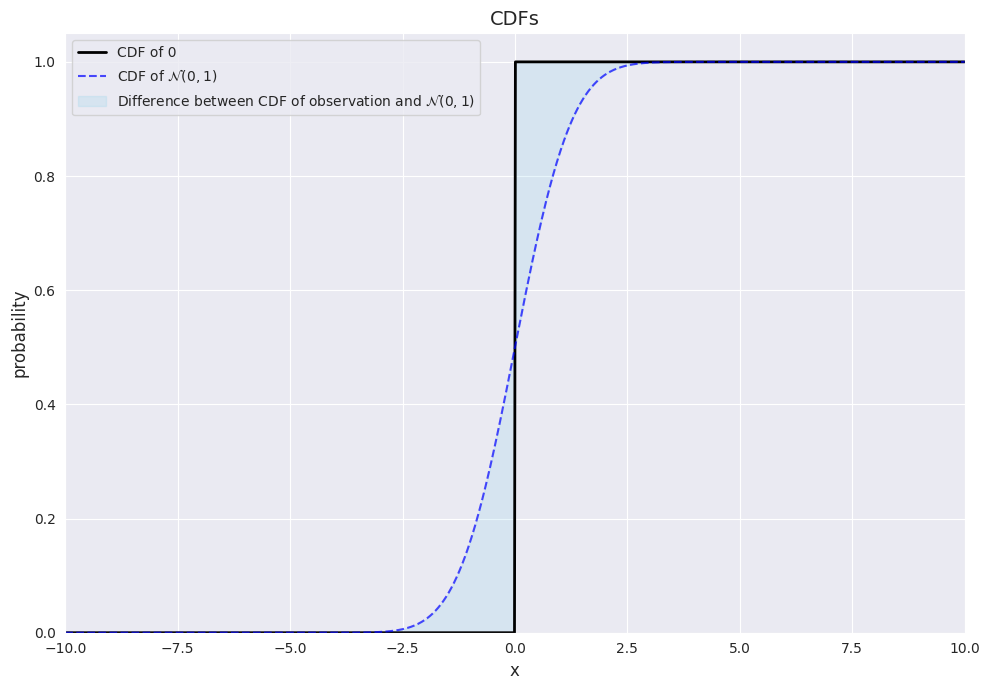

In [40]:
x = np.linspace(-10, 10, 1000)

cdf_0 = np.where(x < 0, 0, 1)
cdf_n01 = norm.cdf(x, loc=-0, scale=1)

plt.figure(figsize=(10, 7))

plt.plot(x, cdf_0, 'k-', linewidth=2, label='CDF of 0')
plt.plot(x, cdf_n01, 'b--', linewidth=1.5, alpha=0.7, label='CDF of $\mathcal{N}(0,1)$')

plt.fill_between(x, cdf_0, cdf_n01, where=(cdf_0 > cdf_n01), color='skyblue', alpha=0.2, label='Difference between CDF of observation and $\mathcal{N}(0,1)$')
plt.fill_between(x, cdf_0, cdf_n01, where=(cdf_0 < cdf_n01), color='skyblue', alpha=0.2)

plt.grid(True)
plt.xlabel('x', fontsize=12)
plt.ylabel('probability', fontsize=12)
plt.title('CDFs', fontsize=14)
plt.legend(loc='upper left', fontsize=10)

plt.xlim(-10, 10)
plt.ylim(0, 1.05)

plt.tight_layout()
plt.show()

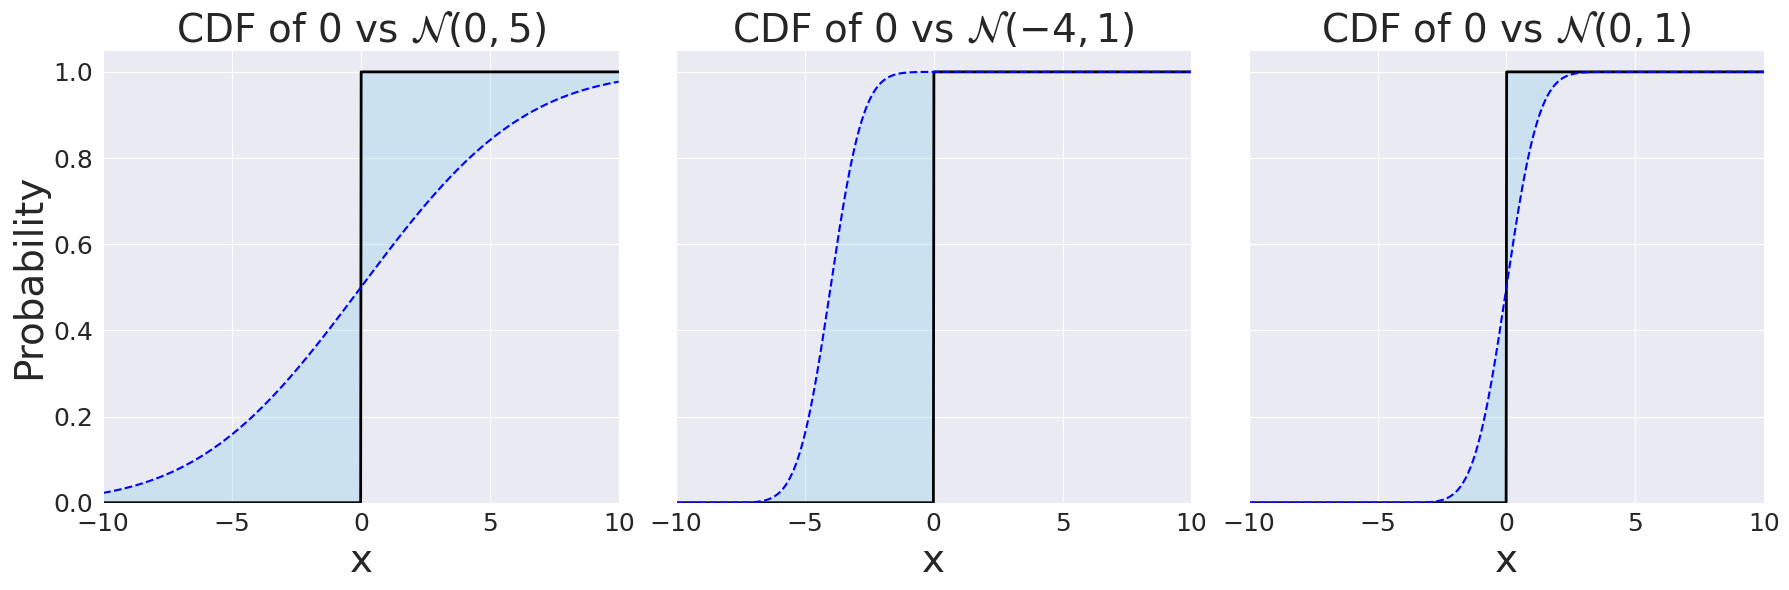

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Create a range of x values
x = np.linspace(-10, 10, 1000)

# Calculate the CDFs
cdf_0 = np.where(x < 0, 0, 1)  # Step function at 0

# Define the distributions to compare with
distributions = [
    {"loc": 0, "scale": 5, "label": "$\mathcal{N}(0,5)$"},
    {"loc": -4, "scale": 1, "label": "$\mathcal{N}(-4,1)$"},
    {"loc": 0, "scale": 1, "label": "$\mathcal{N}(0,1)$"}
]

# Create a figure with 3 subplots side by side
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Create each plot
for i, dist in enumerate(distributions):
    # Calculate the CDF for this distribution
    cdf_dist = norm.cdf(x, loc=dist["loc"], scale=dist["scale"])

    # Plot CDFs
    axes[i].plot(x, cdf_0, 'k-', linewidth=2, label='CDF of 0')
    axes[i].plot(x, cdf_dist, 'b--', linewidth=1.5, label=f'CDF of {dist["label"]}')

    # Fill the difference
    axes[i].fill_between(x, cdf_0, cdf_dist, color='skyblue', alpha=0.3,
                       label=f'Difference')

    # Add grid, labels, and legend
    axes[i].grid(True)
    axes[i].set_xlabel('x', fontsize=28)
    if i == 0:
        axes[i].set_ylabel('Probability', fontsize=28)
    axes[i].set_title(f'CDF of 0 vs {dist["label"]}', fontsize=28)
    # axes[i].legend(loc='upper left', fontsize=18)
    axes[i].set_xlim(-10, 10)
    axes[i].set_ylim(0, 1.05)
    axes[i].tick_params(axis='both', which='major', labelsize=18)

plt.tight_layout()
plt.savefig(os.path.join(FIGUREPATH, "theory/crps_explanation.pdf"), bbox_inches = 'tight', dpi=300)
plt.show()

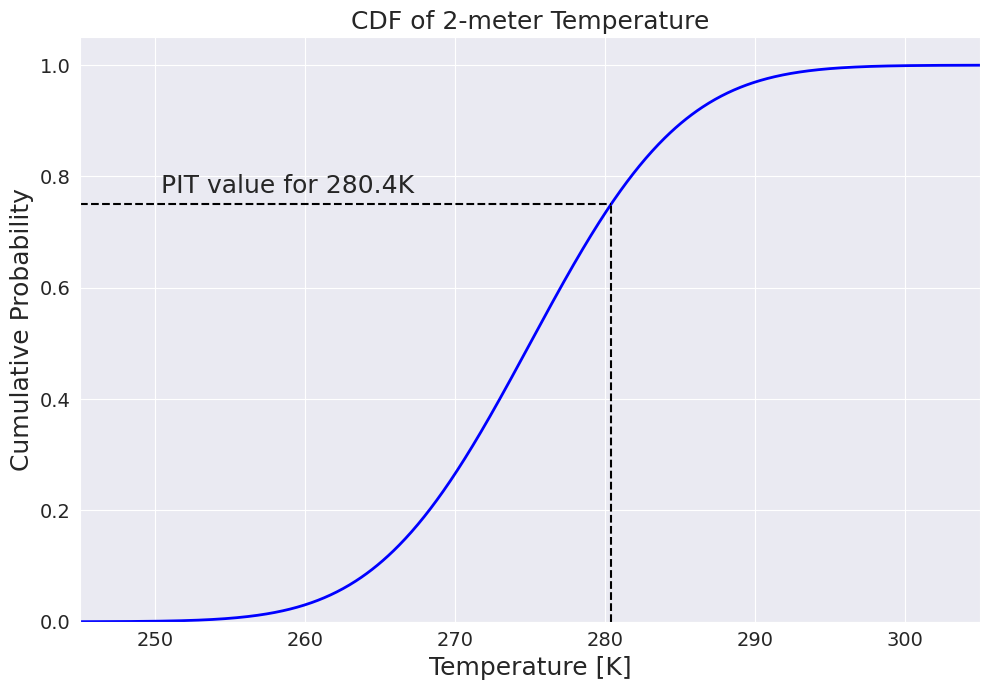

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Create temperature range (in Celsius)
temp = np.linspace(245, 305, 1000)

# Create a normal distribution for temperature
# Assuming mean of 15°C and standard deviation of 8°C
mean_temp = 275
std_temp = 8
temp_cdf = norm.cdf(temp, loc=mean_temp, scale=std_temp)

# Create the plot
plt.figure(figsize=(10, 7))

# Plot the CDF
plt.plot(temp, temp_cdf, 'b-', linewidth=2)

# Add reference lines for specific quantiles
# 20th percentile
# q20 = norm.ppf(0.2, loc=mean_temp, scale=std_temp)
# plt.plot([q20, q20], [0, 0.2], 'k--')
# plt.plot([min(temp), q20], [0.2, 0.2], 'k--')

# 50th percentile (median)
# q50 = norm.ppf(0.5, loc=mean_temp, scale=std_temp)
# plt.plot([q50, q50], [0, 0.5], 'k:')
# plt.plot([min(temp), q50], [0.5, 0.5], 'k:')

# 75th percentile
q75 = norm.ppf(0.75, loc=mean_temp, scale=std_temp)
plt.plot([q75, q75], [0, 0.75], 'k--')
plt.plot([min(temp), q75], [0.75, 0.75], 'k--')

plt.grid(True)
plt.xlabel('Temperature [K]', fontsize=18)
plt.ylabel('Cumulative Probability', fontsize=18)
plt.title('CDF of 2-meter Temperature', fontsize=18)

plt.xlim(245, 305)
plt.ylim(0, 1.05)

plt.text(q75-30, 0.77, f'PIT value for {q75:.1f}K', fontsize=18)
plt.gca().tick_params(axis='both', which='major', labelsize=14)

plt.tight_layout()
plt.savefig(os.path.join(FIGUREPATH, "theory/pit_value_cdf.pdf"), bbox_inches = 'tight', dpi=300)
plt.show()

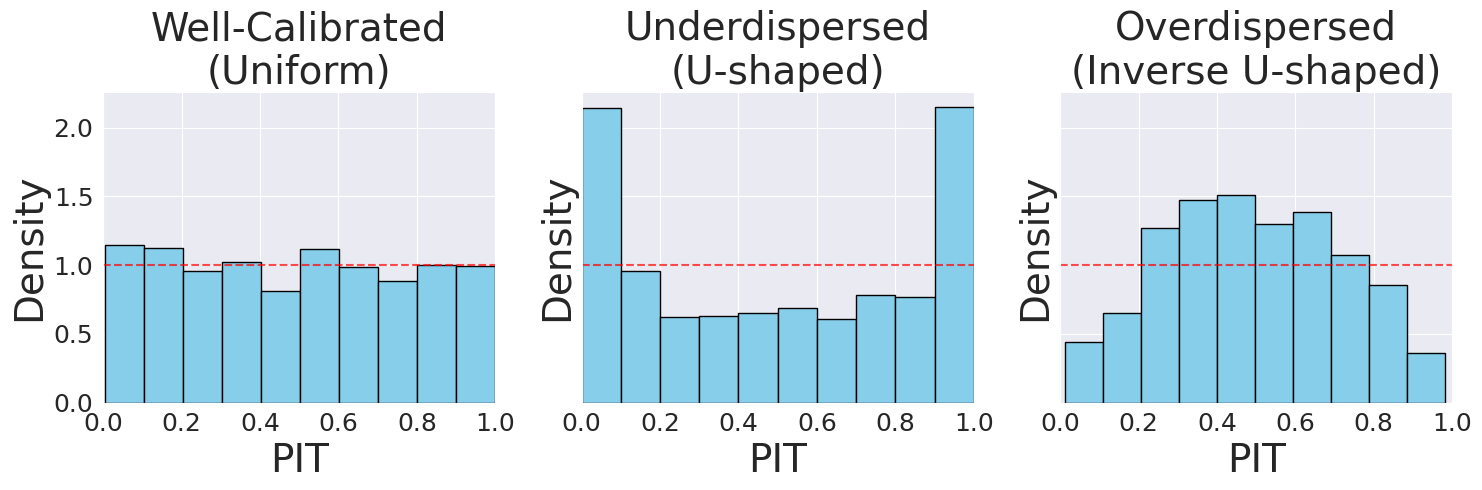

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, beta

# Set random seed for reproducibility
np.random.seed(42)

# Sample size
n = 1000

# Generate PIT values for each scenario
# 1. Well-calibrated: uniform distribution (0,1)
pit_well_calibrated = np.random.uniform(0, 1, n)

# 2. Underdispersed: U-shaped distribution (beta with alpha<1, beta<1)
pit_underdispersed = beta.rvs(0.5, 0.5, size=n)

# 3. Overdispersed: hump-shaped distribution (beta with alpha>1, beta>1)
pit_overdispersed = beta.rvs(2, 2, size=n)

# Create the figure with 3 subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

# Function to plot histogram with consistent settings
def plot_pit_histogram(ax, data, title):
    ax.hist(data, bins=10, density=True, color='blue', edgecolor='black')
    ax.set_xlim(0, 1)
    ax.set_xlabel('PIT', fontsize=28)
    ax.set_ylabel('Density', fontsize=28)
    ax.set_title(title, fontsize=28)
    # Add a horizontal line at y=1 to show the ideal uniform density
    ax.axhline(y=1, color='red', linestyle='--', alpha=0.7)
    ax.tick_params(axis='both', which='major', labelsize=18)

# Plot the three histograms
plot_pit_histogram(axes[0], pit_well_calibrated, 'Well-Calibrated\n(Uniform)')
plot_pit_histogram(axes[1], pit_underdispersed, 'Underdispersed\n(U-shaped)')
plot_pit_histogram(axes[2], pit_overdispersed, 'Overdispersed\n(Inverse U-shaped)')

plt.tight_layout()
plt.savefig(os.path.join(FIGUREPATH, "theory/pit_explain3.pdf"), bbox_inches = 'tight', dpi=300)

plt.show()

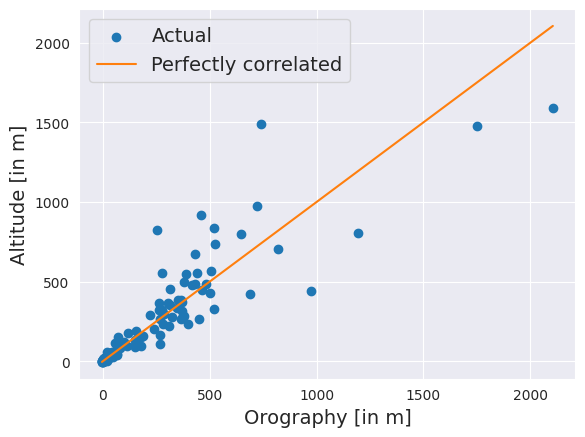

In [3]:
plt.scatter(t_stations_f['orog'], t_stations_f['altitude'], color='#1f77b4', label='Actual')
x_values = [min(t_stations_f['orog']), max(t_stations_f['orog'])]
y_values = x_values
plt.plot(x_values, y_values, color='#ff7f0e', label='Perfectly correlated')
# plt.title('Scatter Plot')
plt.xlabel('Orography [in m]', fontsize=14)
plt.ylabel('Altitude [in m]', fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.legend(fontsize=14)
plt.savefig(os.path.join(FIGUREPATH, "eda/alt_orog_corr.pdf"), bbox_inches = 'tight', dpi=300)
plt.show()